EXPLORATORY ANALYSIS

In [38]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import re
from pathlib import Path
sys.path.append(str(Path().resolve().parent))
from config import io_config


ANALYSE RESULTS CSV

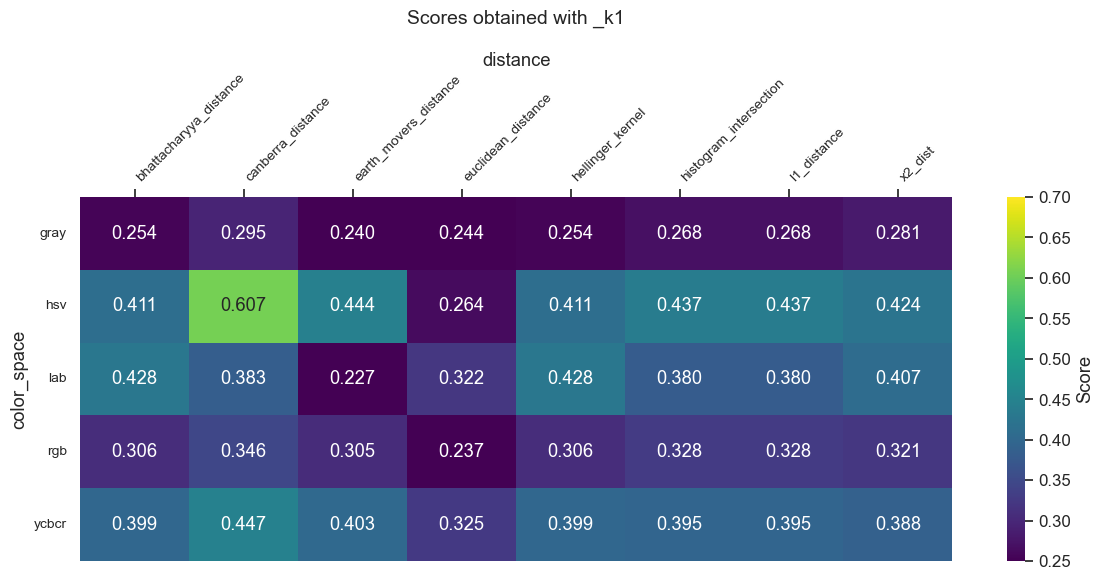

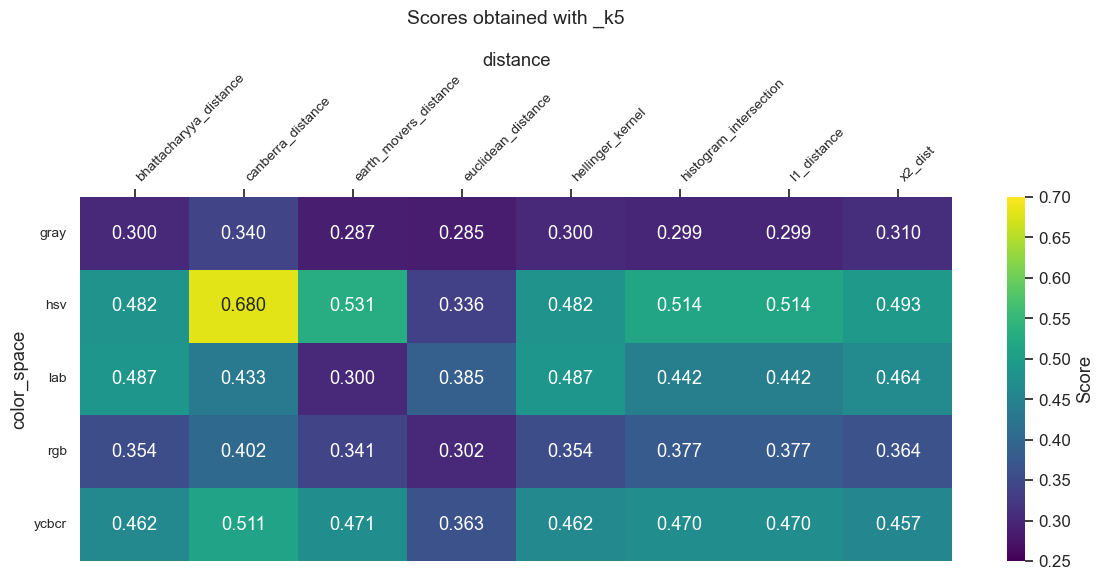

In [39]:
csv_path = Path("../results/dev_scores.csv")
df = pd.read_csv(csv_path)

def extract_color_space(desc):
    m = re.search(r"(hsv|lab|rgb|ycbcr|gray)", desc, re.IGNORECASE)
    return m.group(1).lower() if m else "unknown"

def extract_bins(desc):
    m = re.search(r"bins(\d+(?:-\d+)*)", desc)
    return m.group(1) if m else "unknown"

def extract_weights(desc):
    m = re.search(r"_w([0-9\.\-]+)", desc)
    return m.group(1).replace("-", ", ") if m else "unknown"

df["color_space"] = df["descriptor"].apply(extract_color_space)

df_grouped = df.groupby(["color_space", "distance"], as_index=False).agg({
    "mAP@1": "mean",
    "mAP@5": "mean"
})

pivot_map1 = df_grouped.pivot(index="color_space", columns="distance", values="mAP@1")
pivot_map5 = df_grouped.pivot(index="color_space", columns="distance", values="mAP@5")

def plot_heatmap(pivot, title):
    sns.set(font_scale=1.1, style="whitegrid")
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(
        pivot,
        annot=True,
        fmt=".3f",
        cmap="viridis",
        cbar_kws={"label": "Score"},
        vmin=0.25,
        vmax=0.7
    )
    ax.set_title(title, fontsize=14, pad=20)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=45, ha="left", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

plot_heatmap(pivot_map1, "Scores obtained with _k1")
plot_heatmap(pivot_map5, "Scores obtained with _k5")


Now we want to analyze the effect of weight for each distance in a particular example

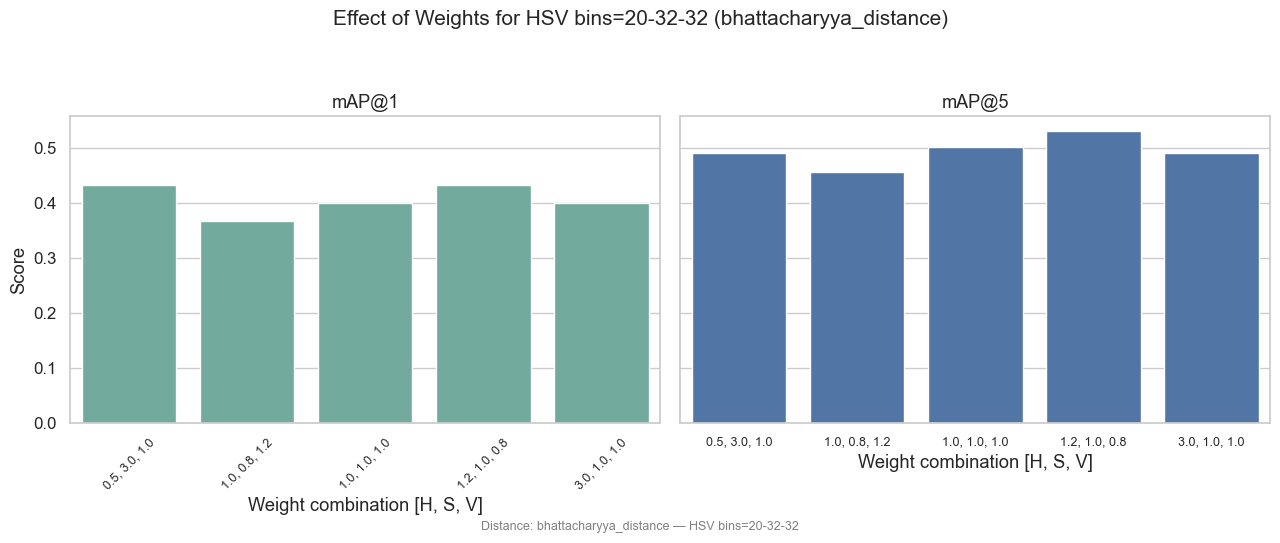

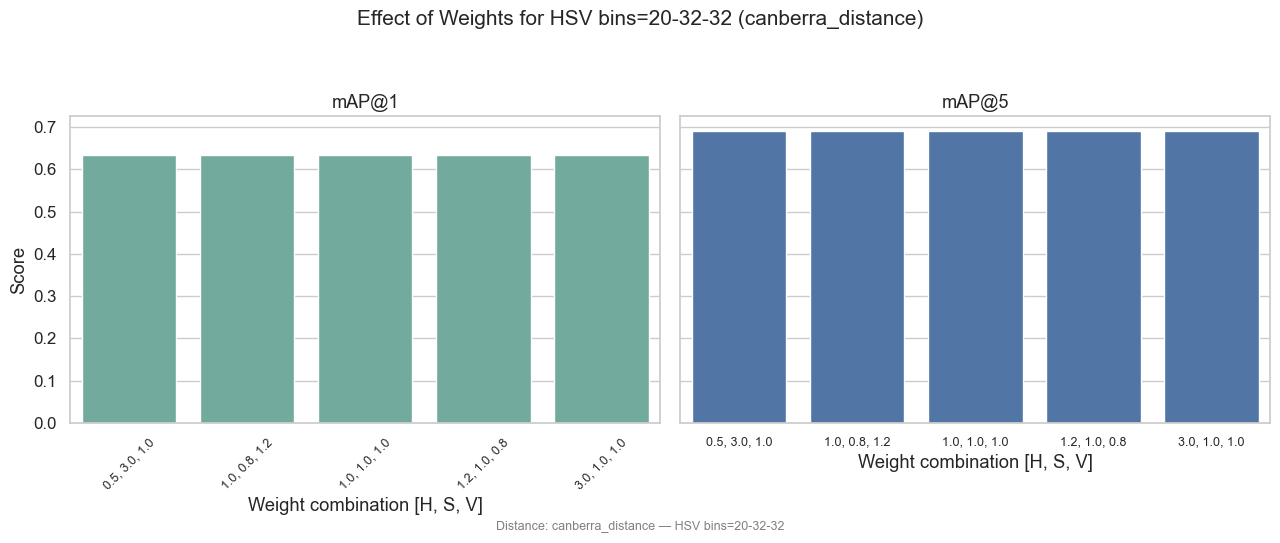

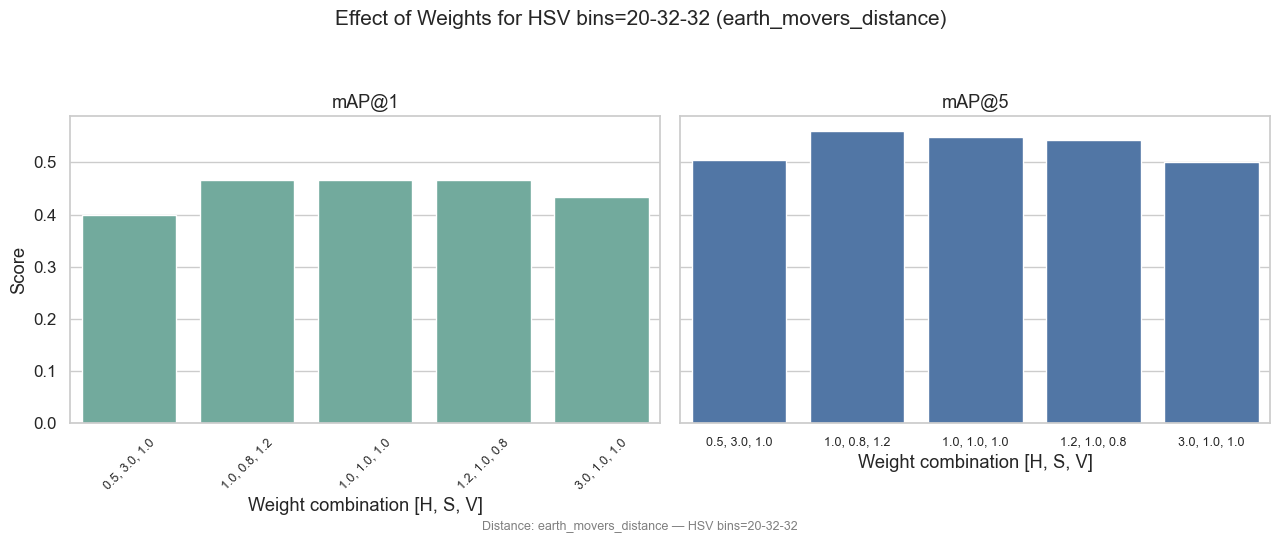

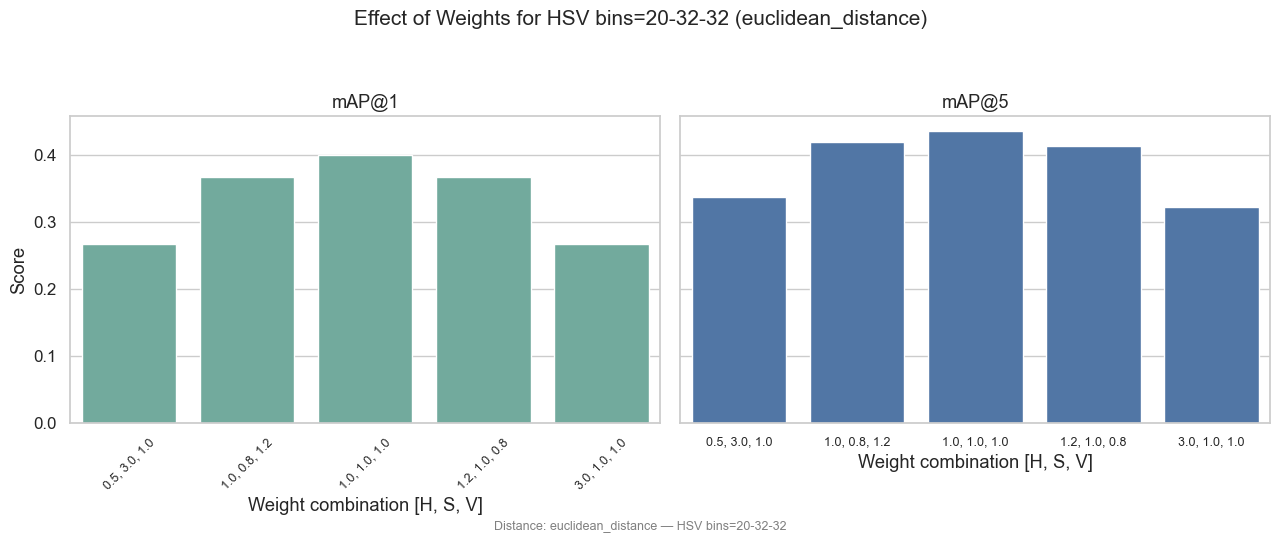

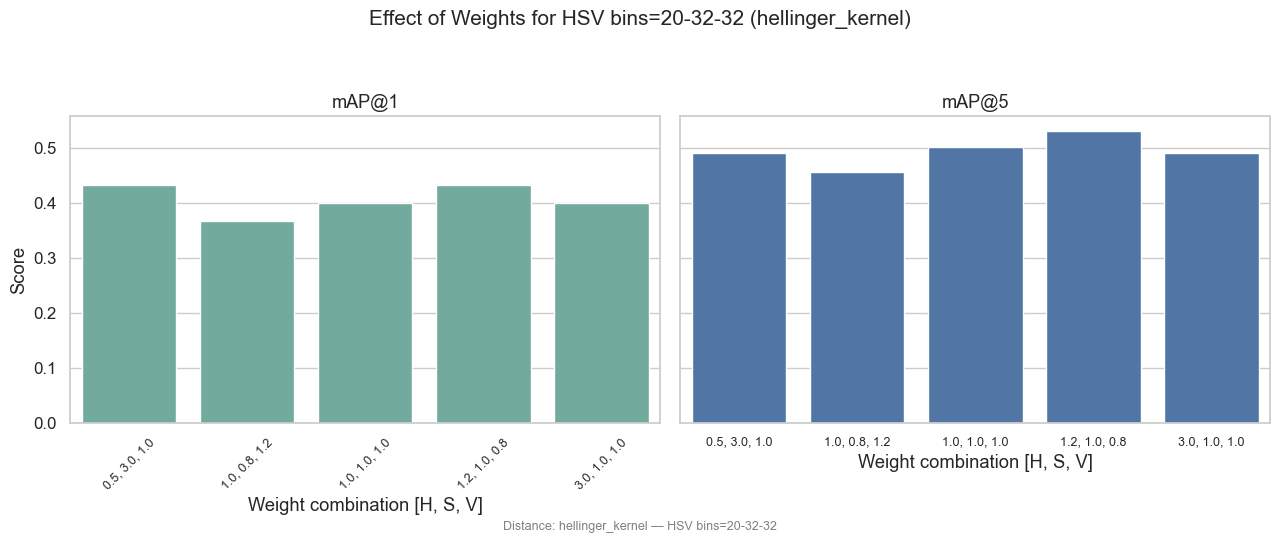

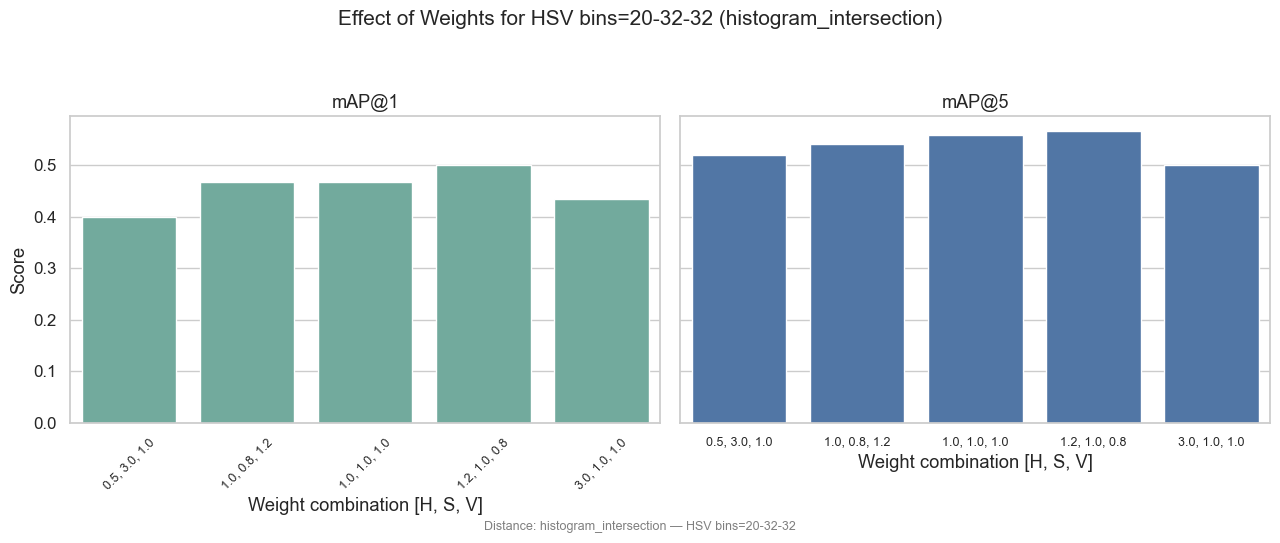

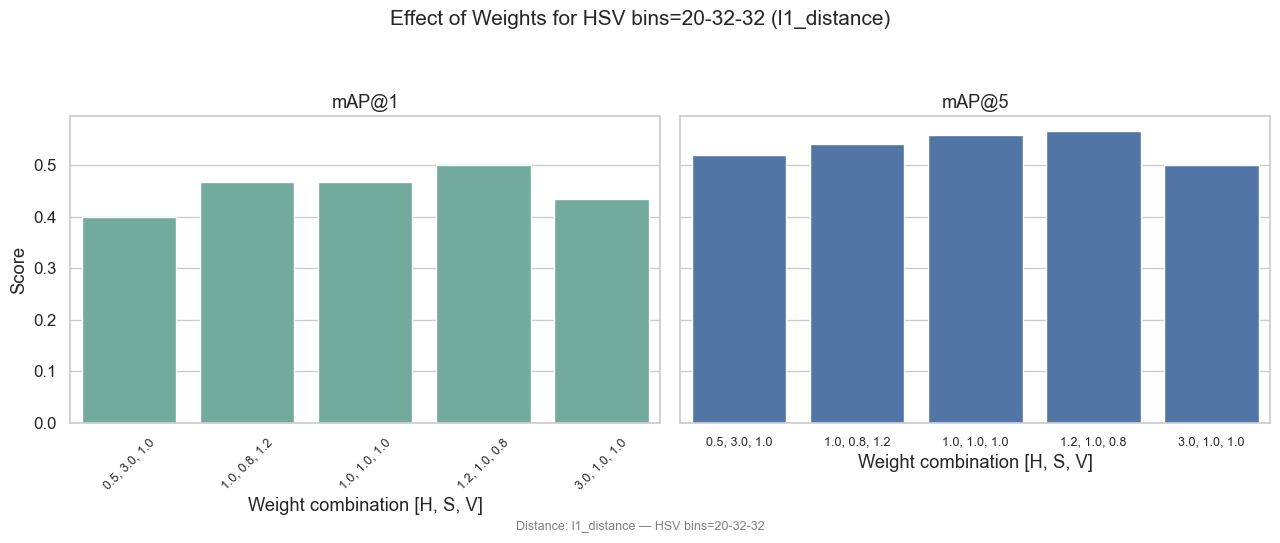

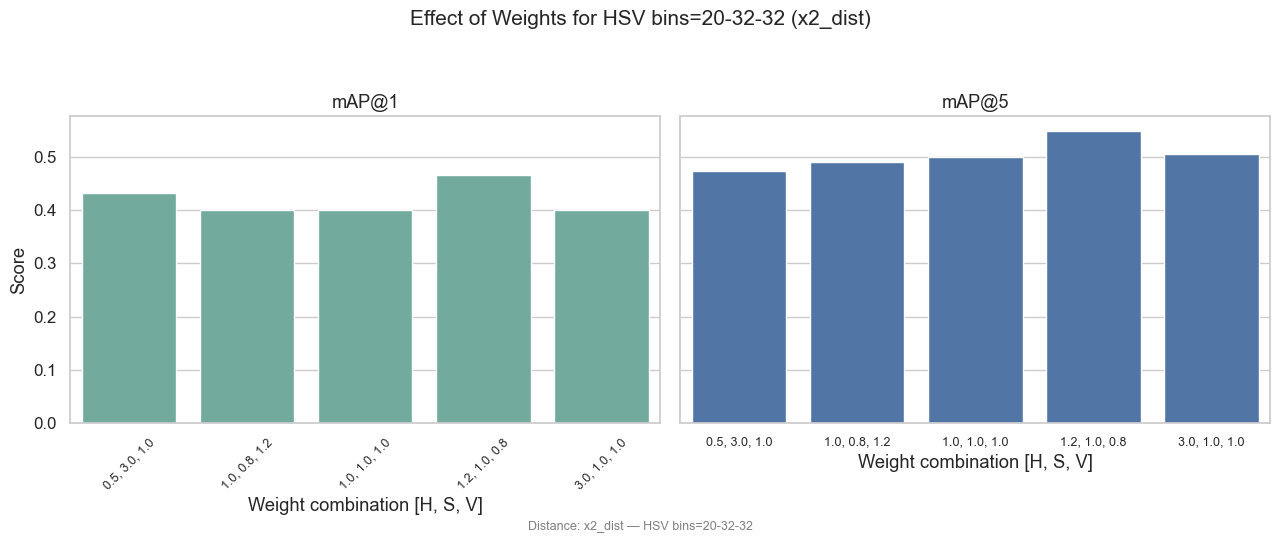

In [40]:

df = pd.read_csv(csv_path)
df["color_space"] = df["descriptor"].apply(extract_color_space)
df["bins"] = df["descriptor"].apply(extract_bins)
df["weights"] = df["descriptor"].apply(extract_weights)


#FIXED
color_space_fixed = "hsv"
bins_fixed = "20-32-32"



subset = df[(df["color_space"] == color_space_fixed) & (df["bins"] == bins_fixed)]
subset_grouped = subset.groupby(["distance", "weights"], as_index=False)[["mAP@1", "mAP@5"]].mean()

sns.set(style="whitegrid", font_scale=1.1)
unique_dists = subset_grouped["distance"].unique()

for dist in unique_dists:
    data_dist = subset_grouped[subset_grouped["distance"] == dist]

    fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
    fig.suptitle(f"Effect of Weights for {color_space_fixed.upper()} bins={bins_fixed} ({dist})",
                 fontsize=15, y=1.05)

    # --- mAP@1 ---
    sns.barplot(
        data=data_dist, x="weights", y="mAP@1",
        color="#69b3a2", ax=axes[0]
    )
    axes[0].set_title("mAP@1", fontsize=13)
    axes[0].set_xlabel("Weight combination [H, S, V]")
    axes[0].set_ylabel("Score")
    axes[0].tick_params(axis="x", rotation=45)

    # --- mAP@5 ---
    sns.barplot(
        data=data_dist, x="weights", y="mAP@5",
        color="#4374B3", ax=axes[1]
    )
    axes[1].set_title("mAP@5", fontsize=13)
    axes[1].set_xlabel("Weight combination [H, S, V]")
    axes[1].set_ylabel("")

    for ax in axes:
        ax.set_ylim(0, max(data_dist[["mAP@1","mAP@5"]].max()) * 1.05)
        for label in ax.get_xticklabels():
            label.set_fontsize(9)
    plt.figtext(0.5, 0.01, f"Distance: {dist} — HSV bins={bins_fixed}", ha="center", fontsize=9, color="gray")

    plt.tight_layout()
    plt.show()


Now the effect of bins

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

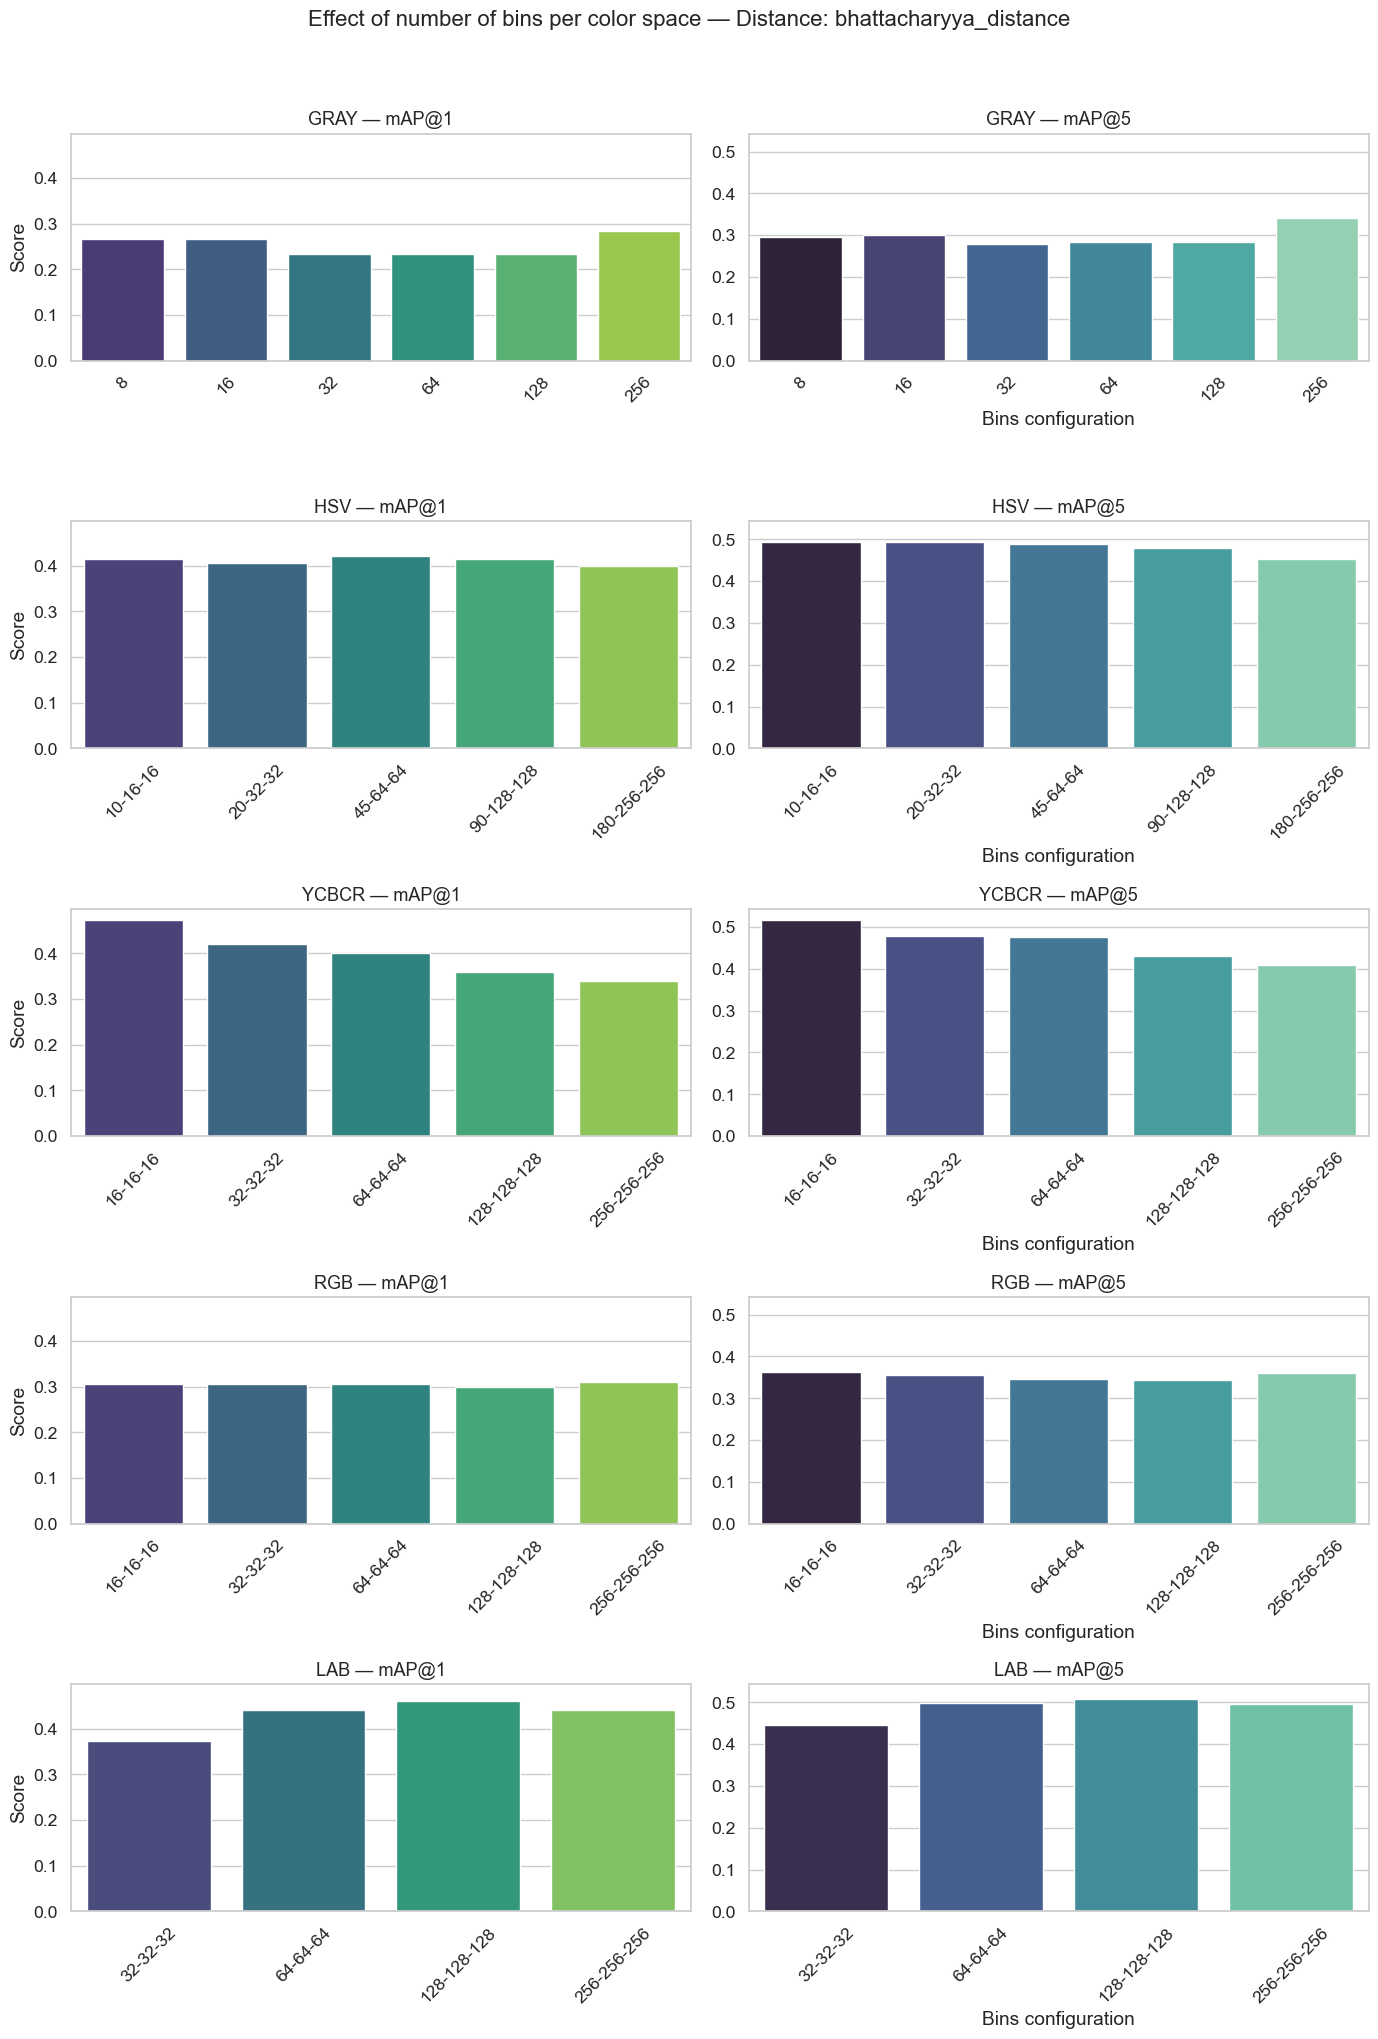

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

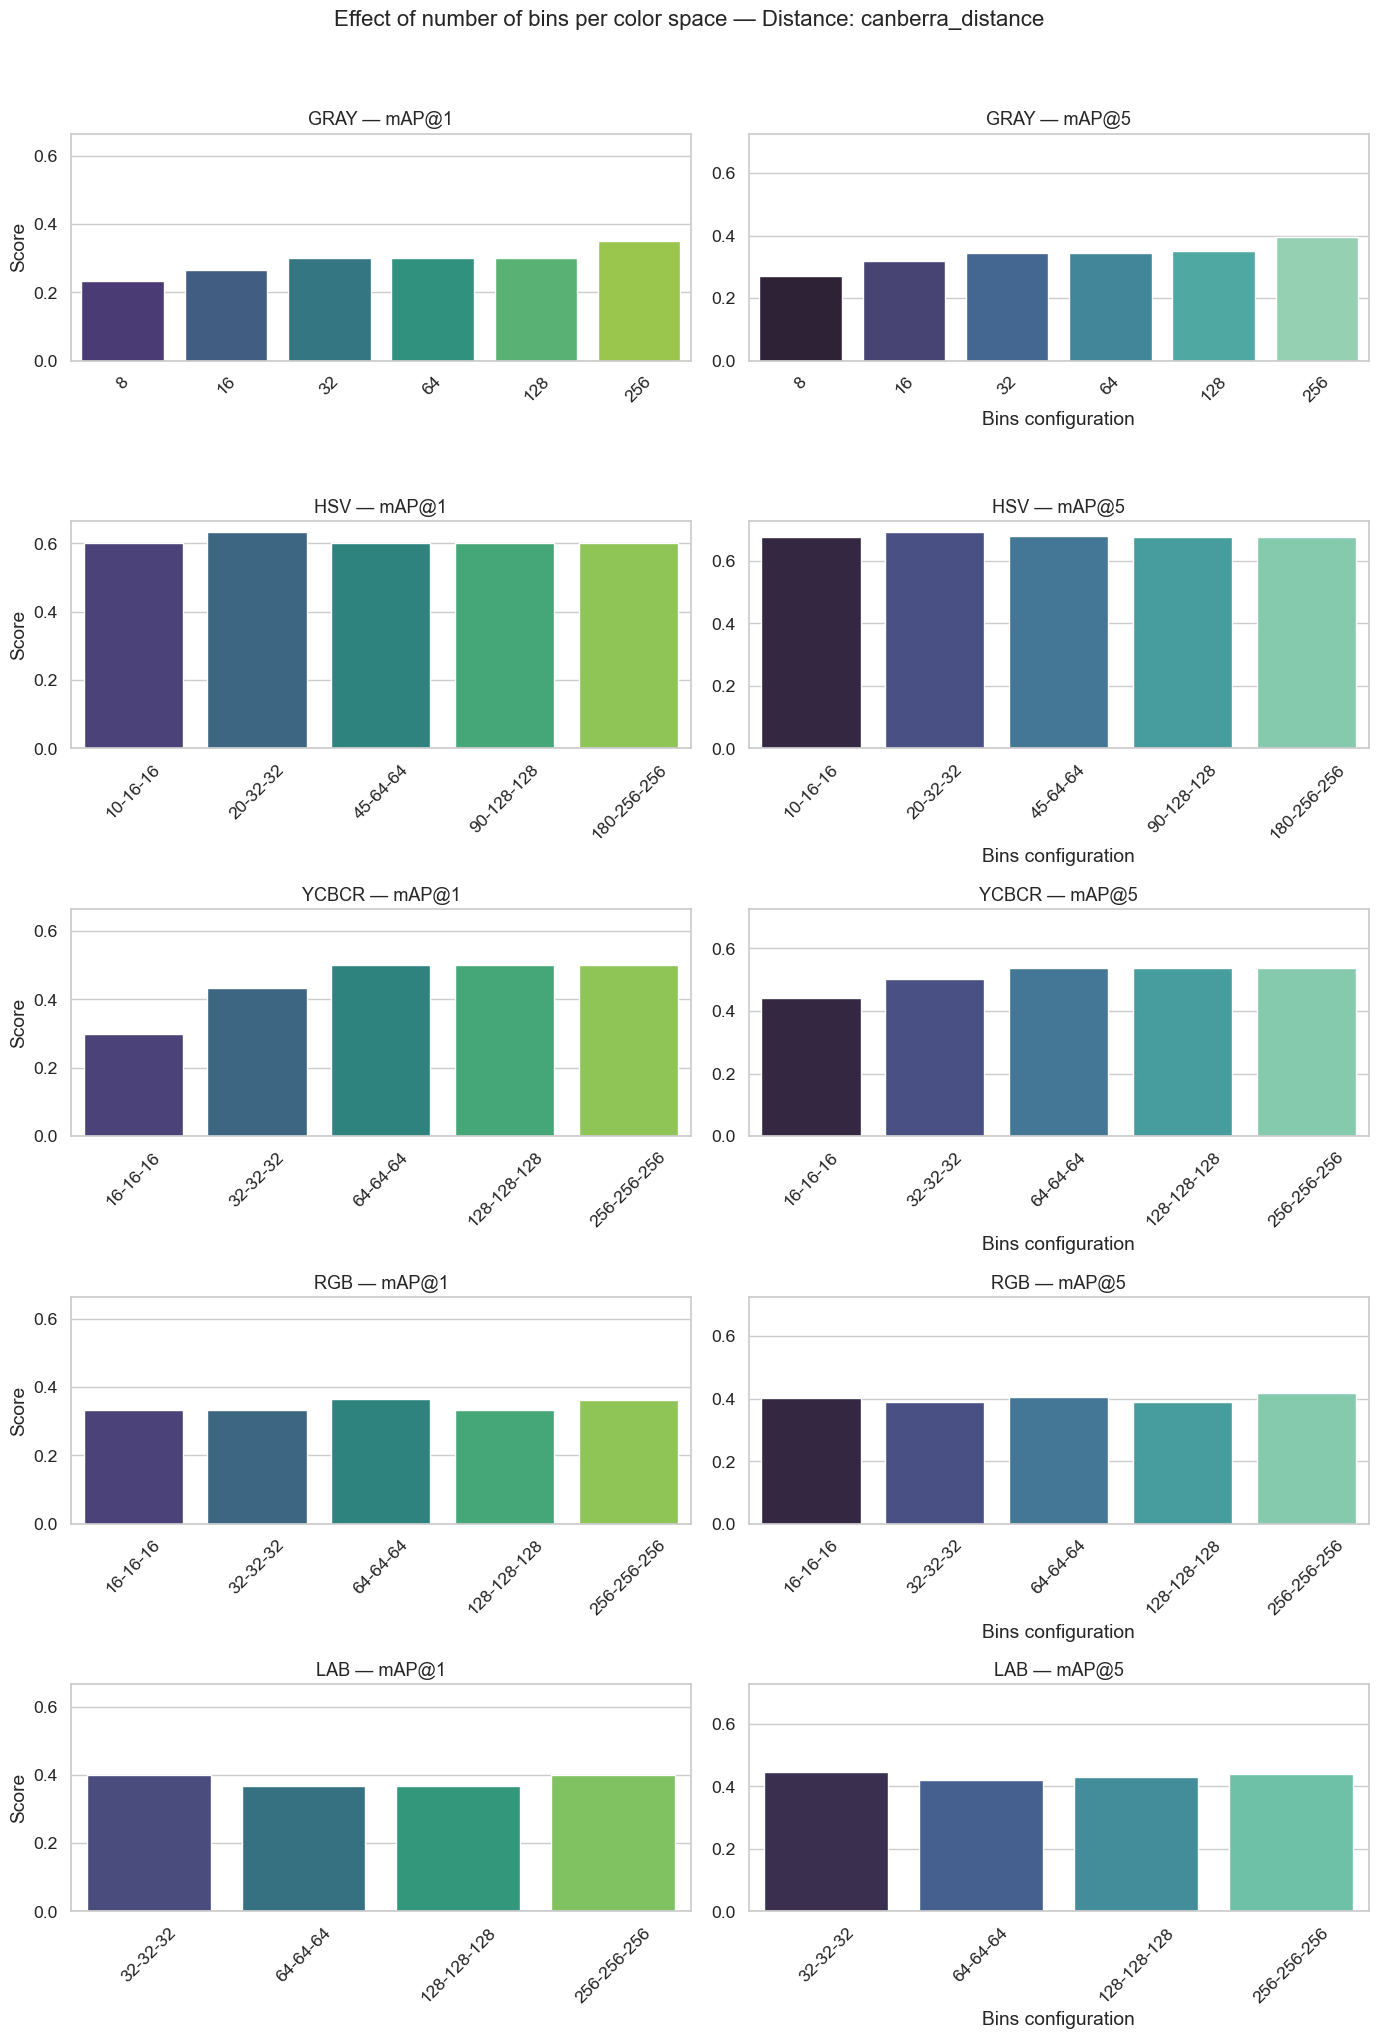

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

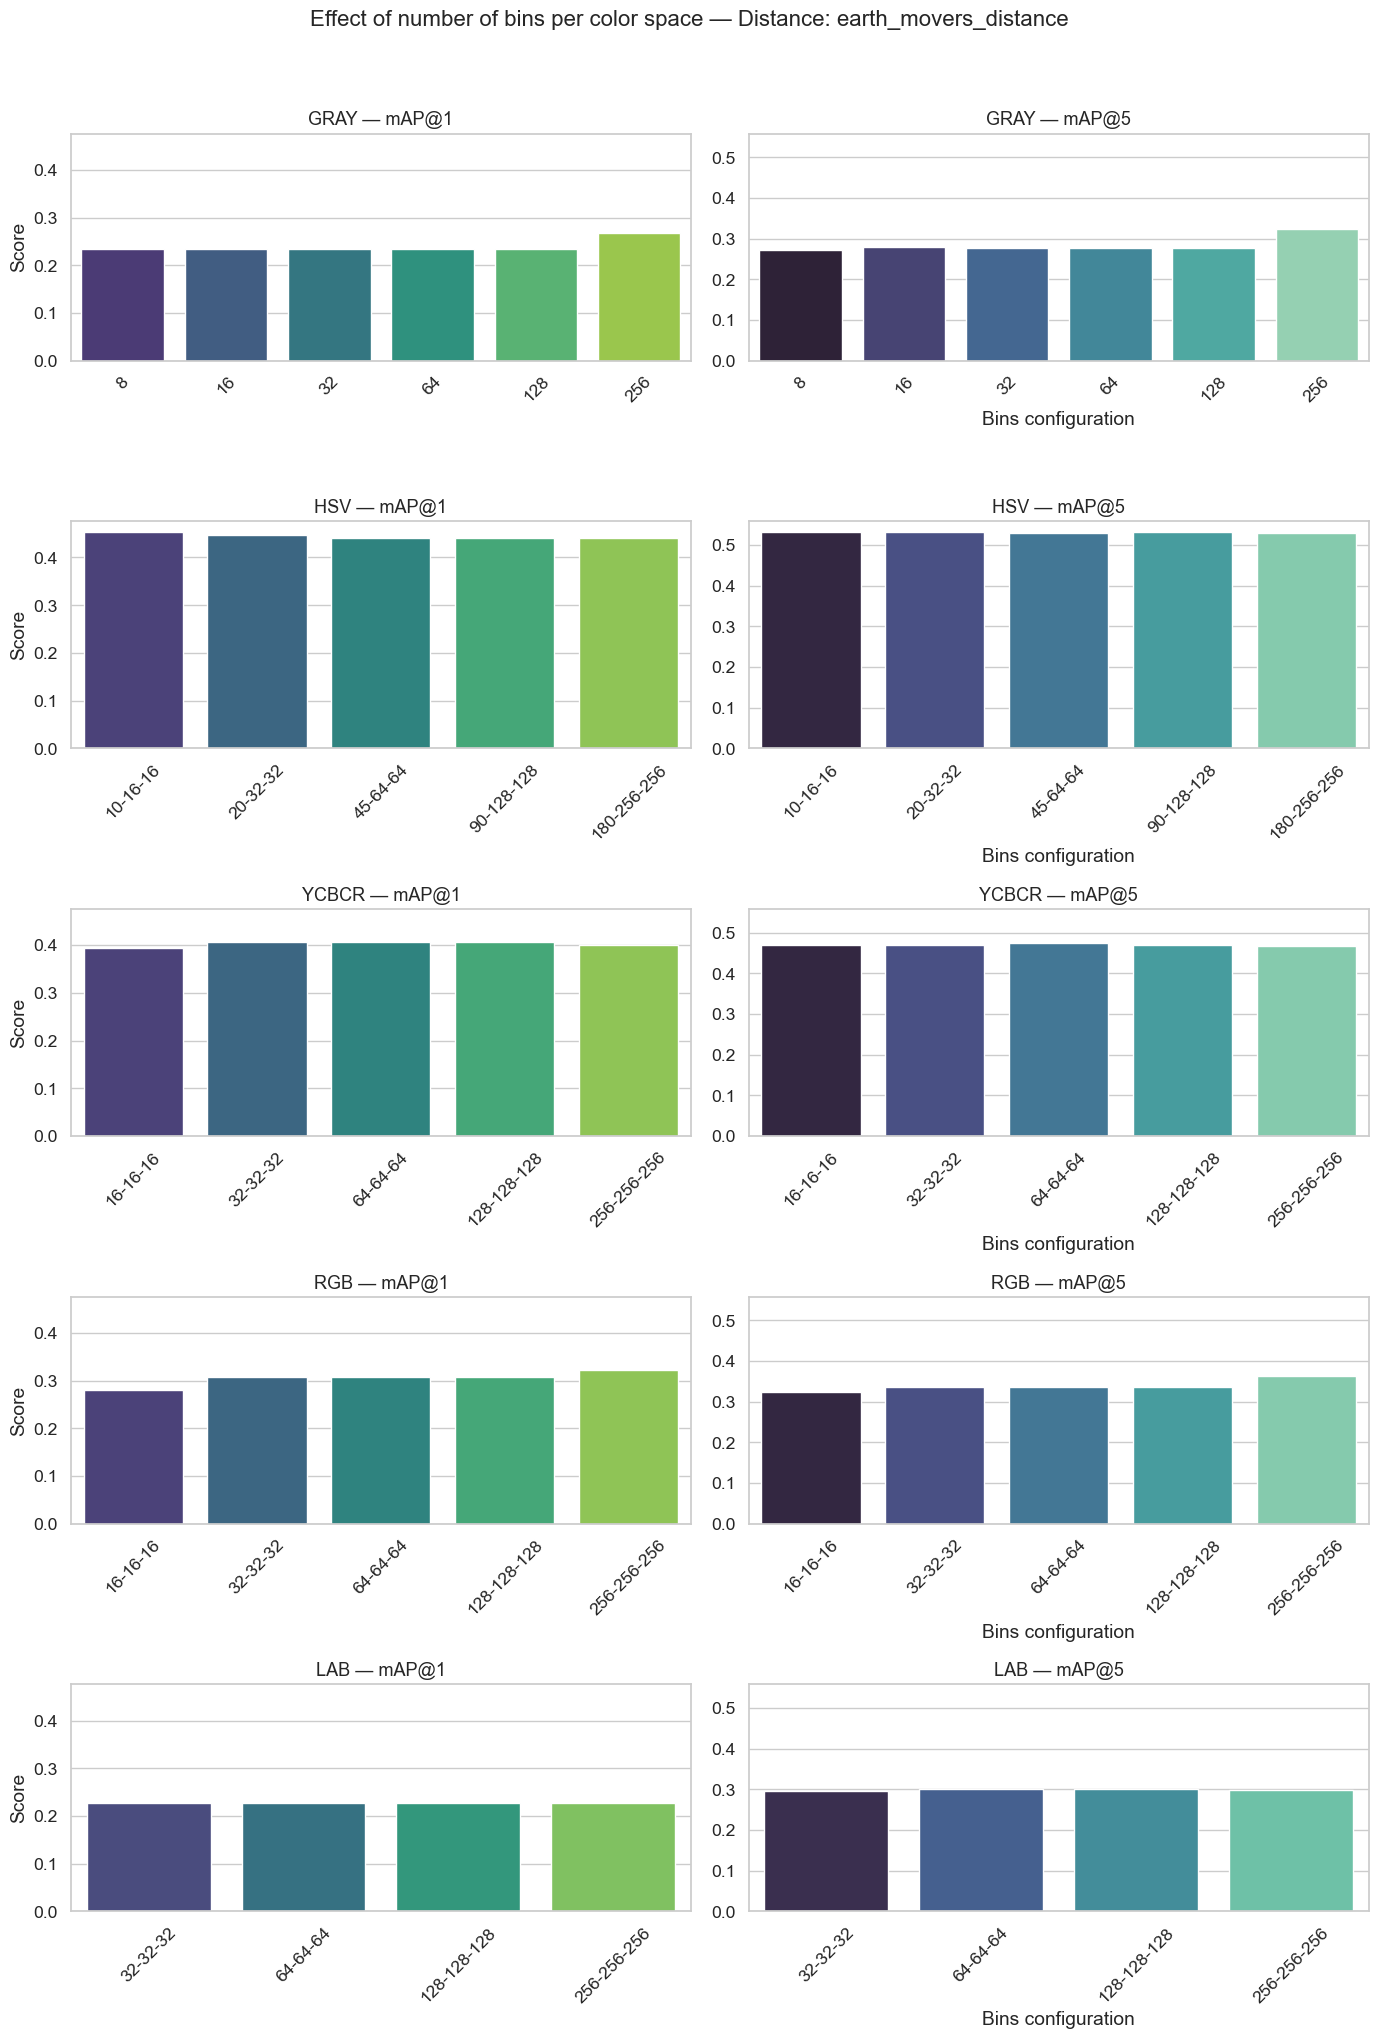

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

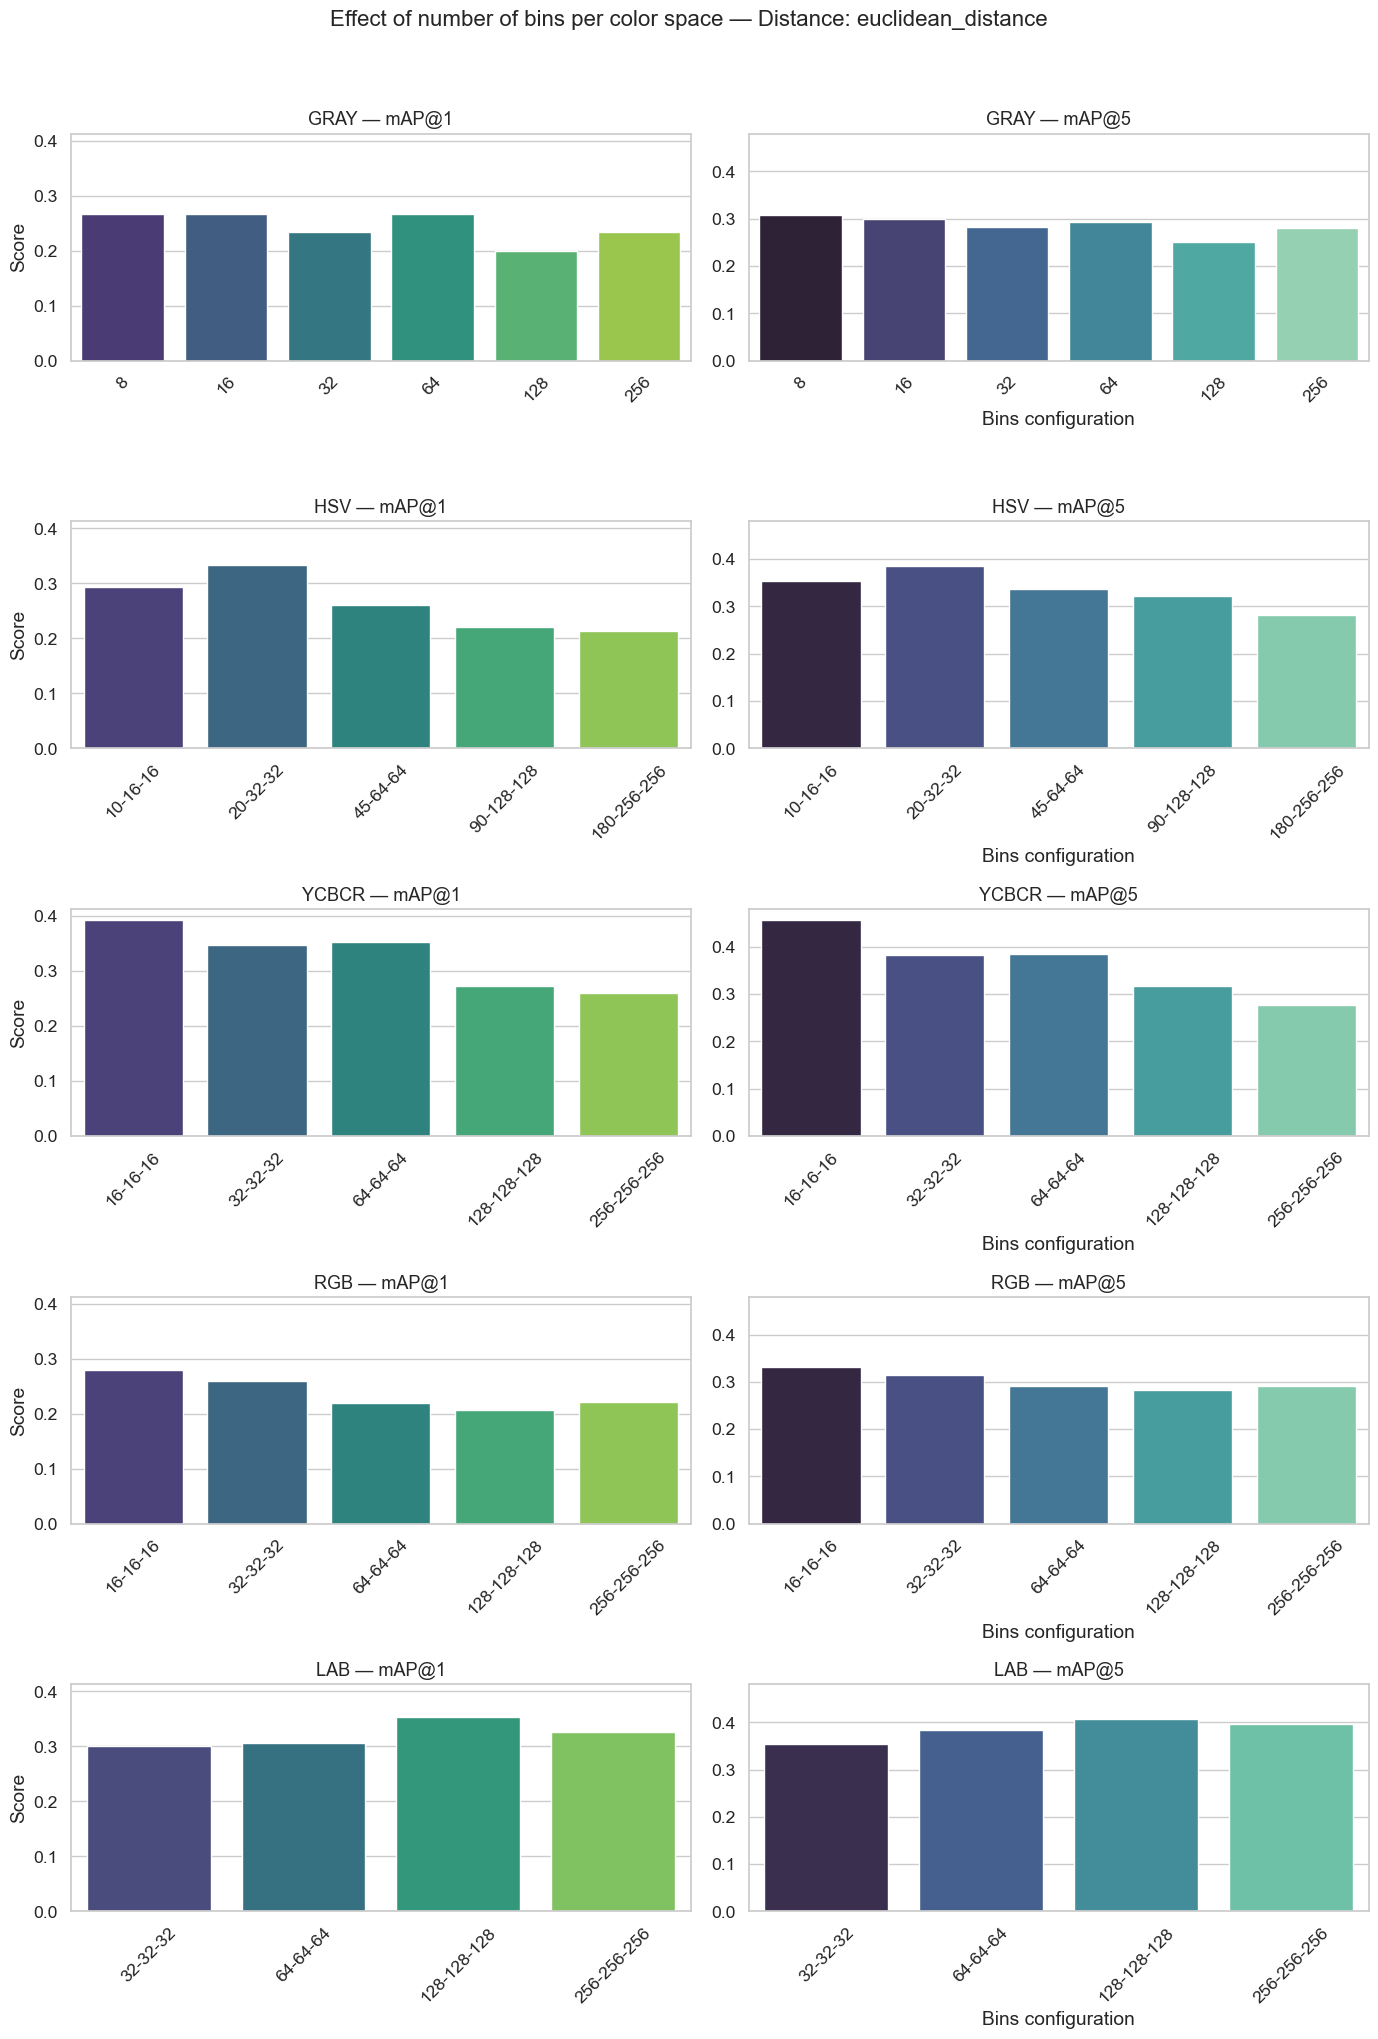

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

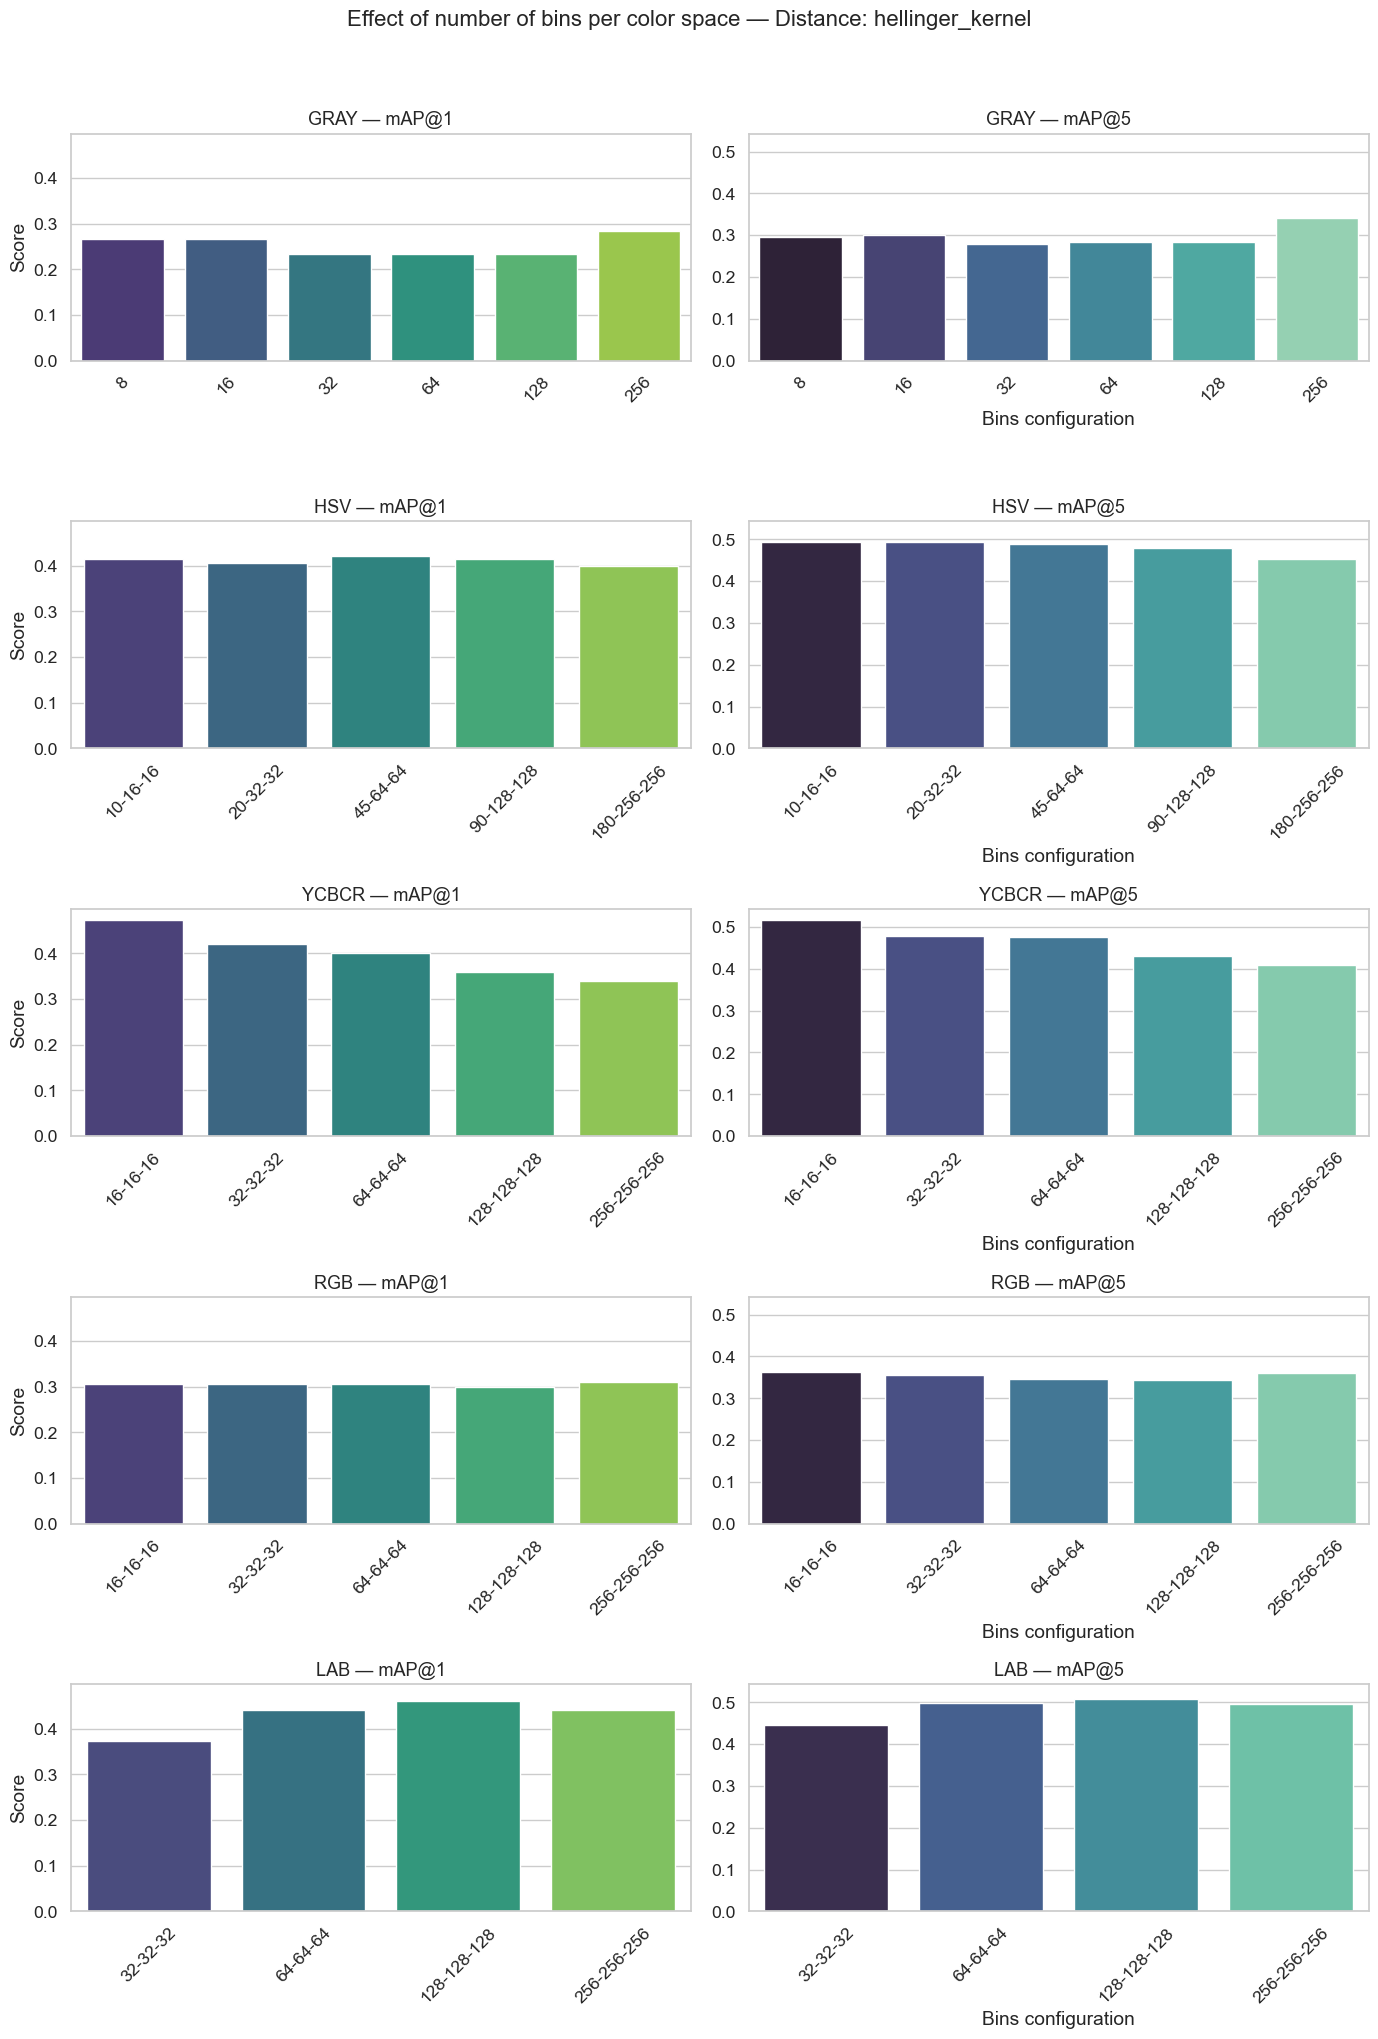

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

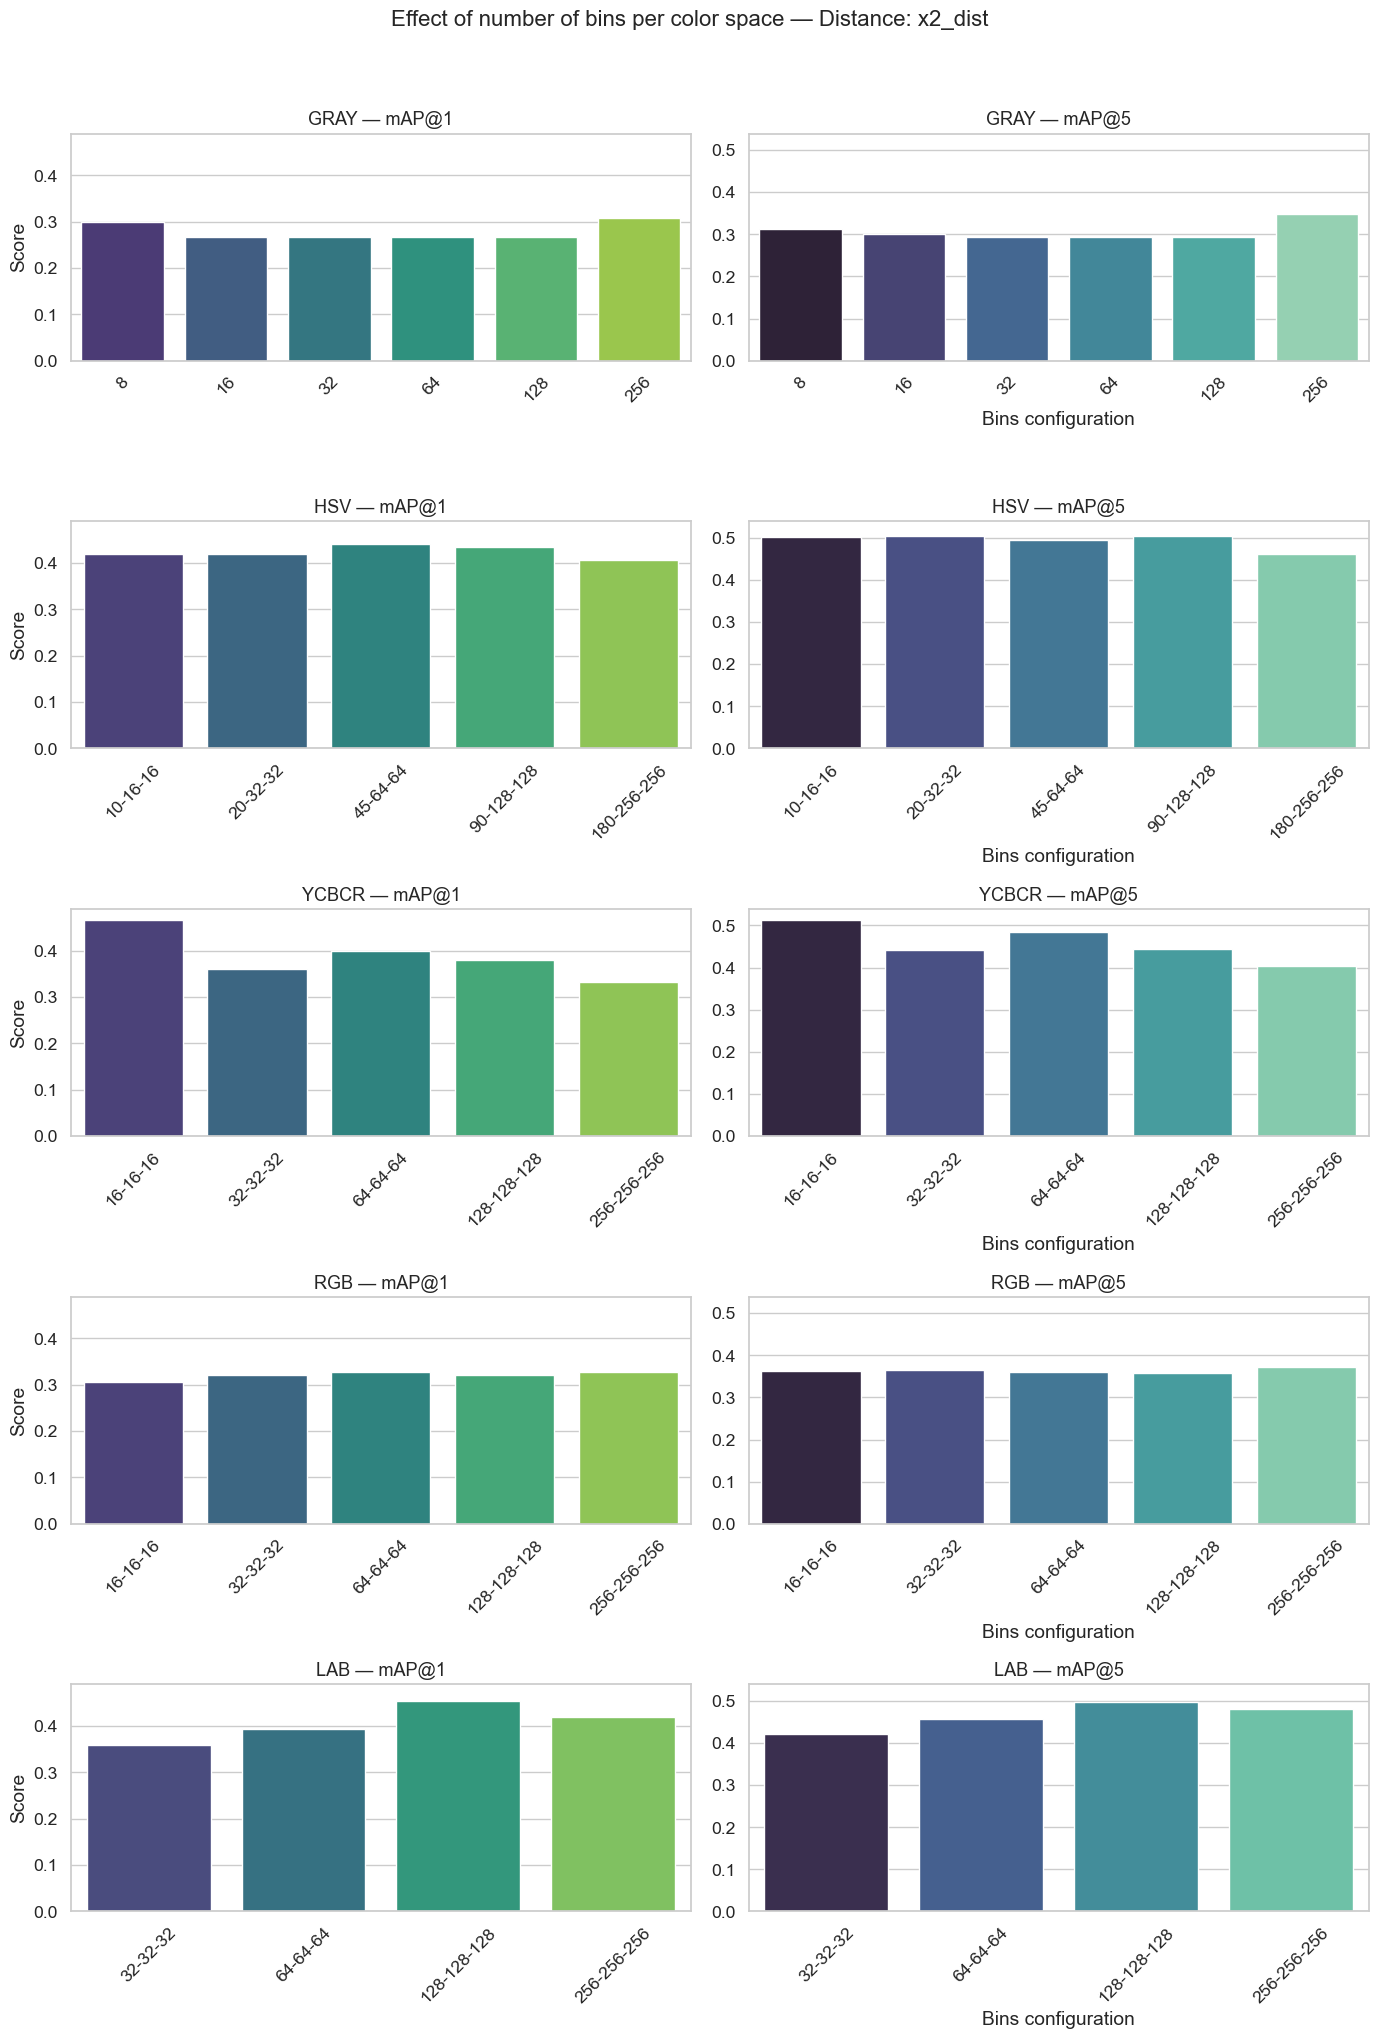

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

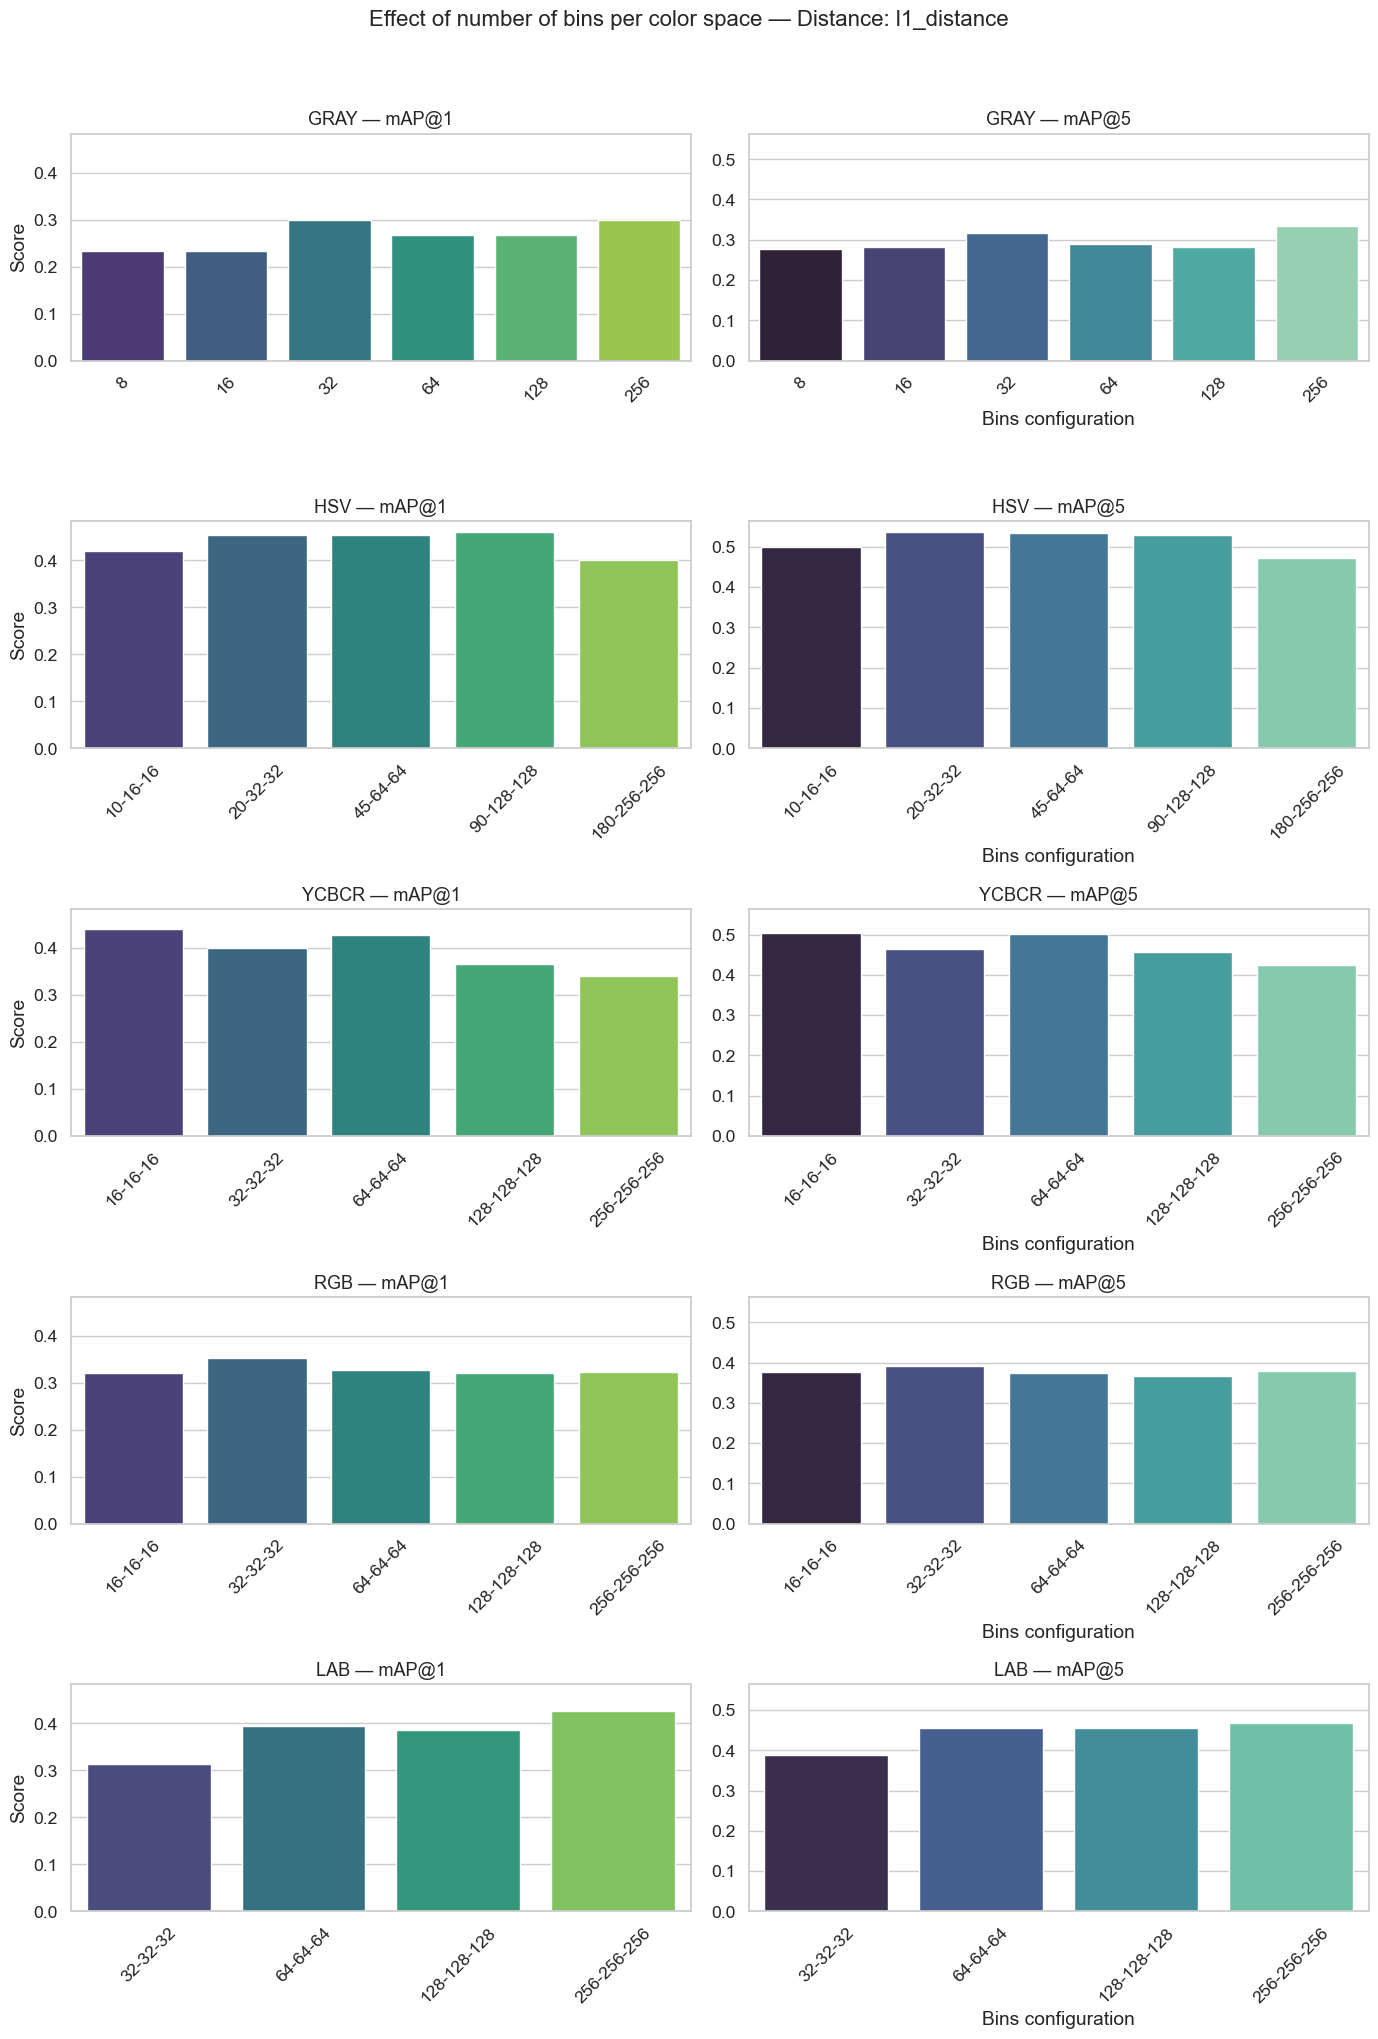

C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xavipba\AppData\Local\Temp\ipykernel_14676\2539371880.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

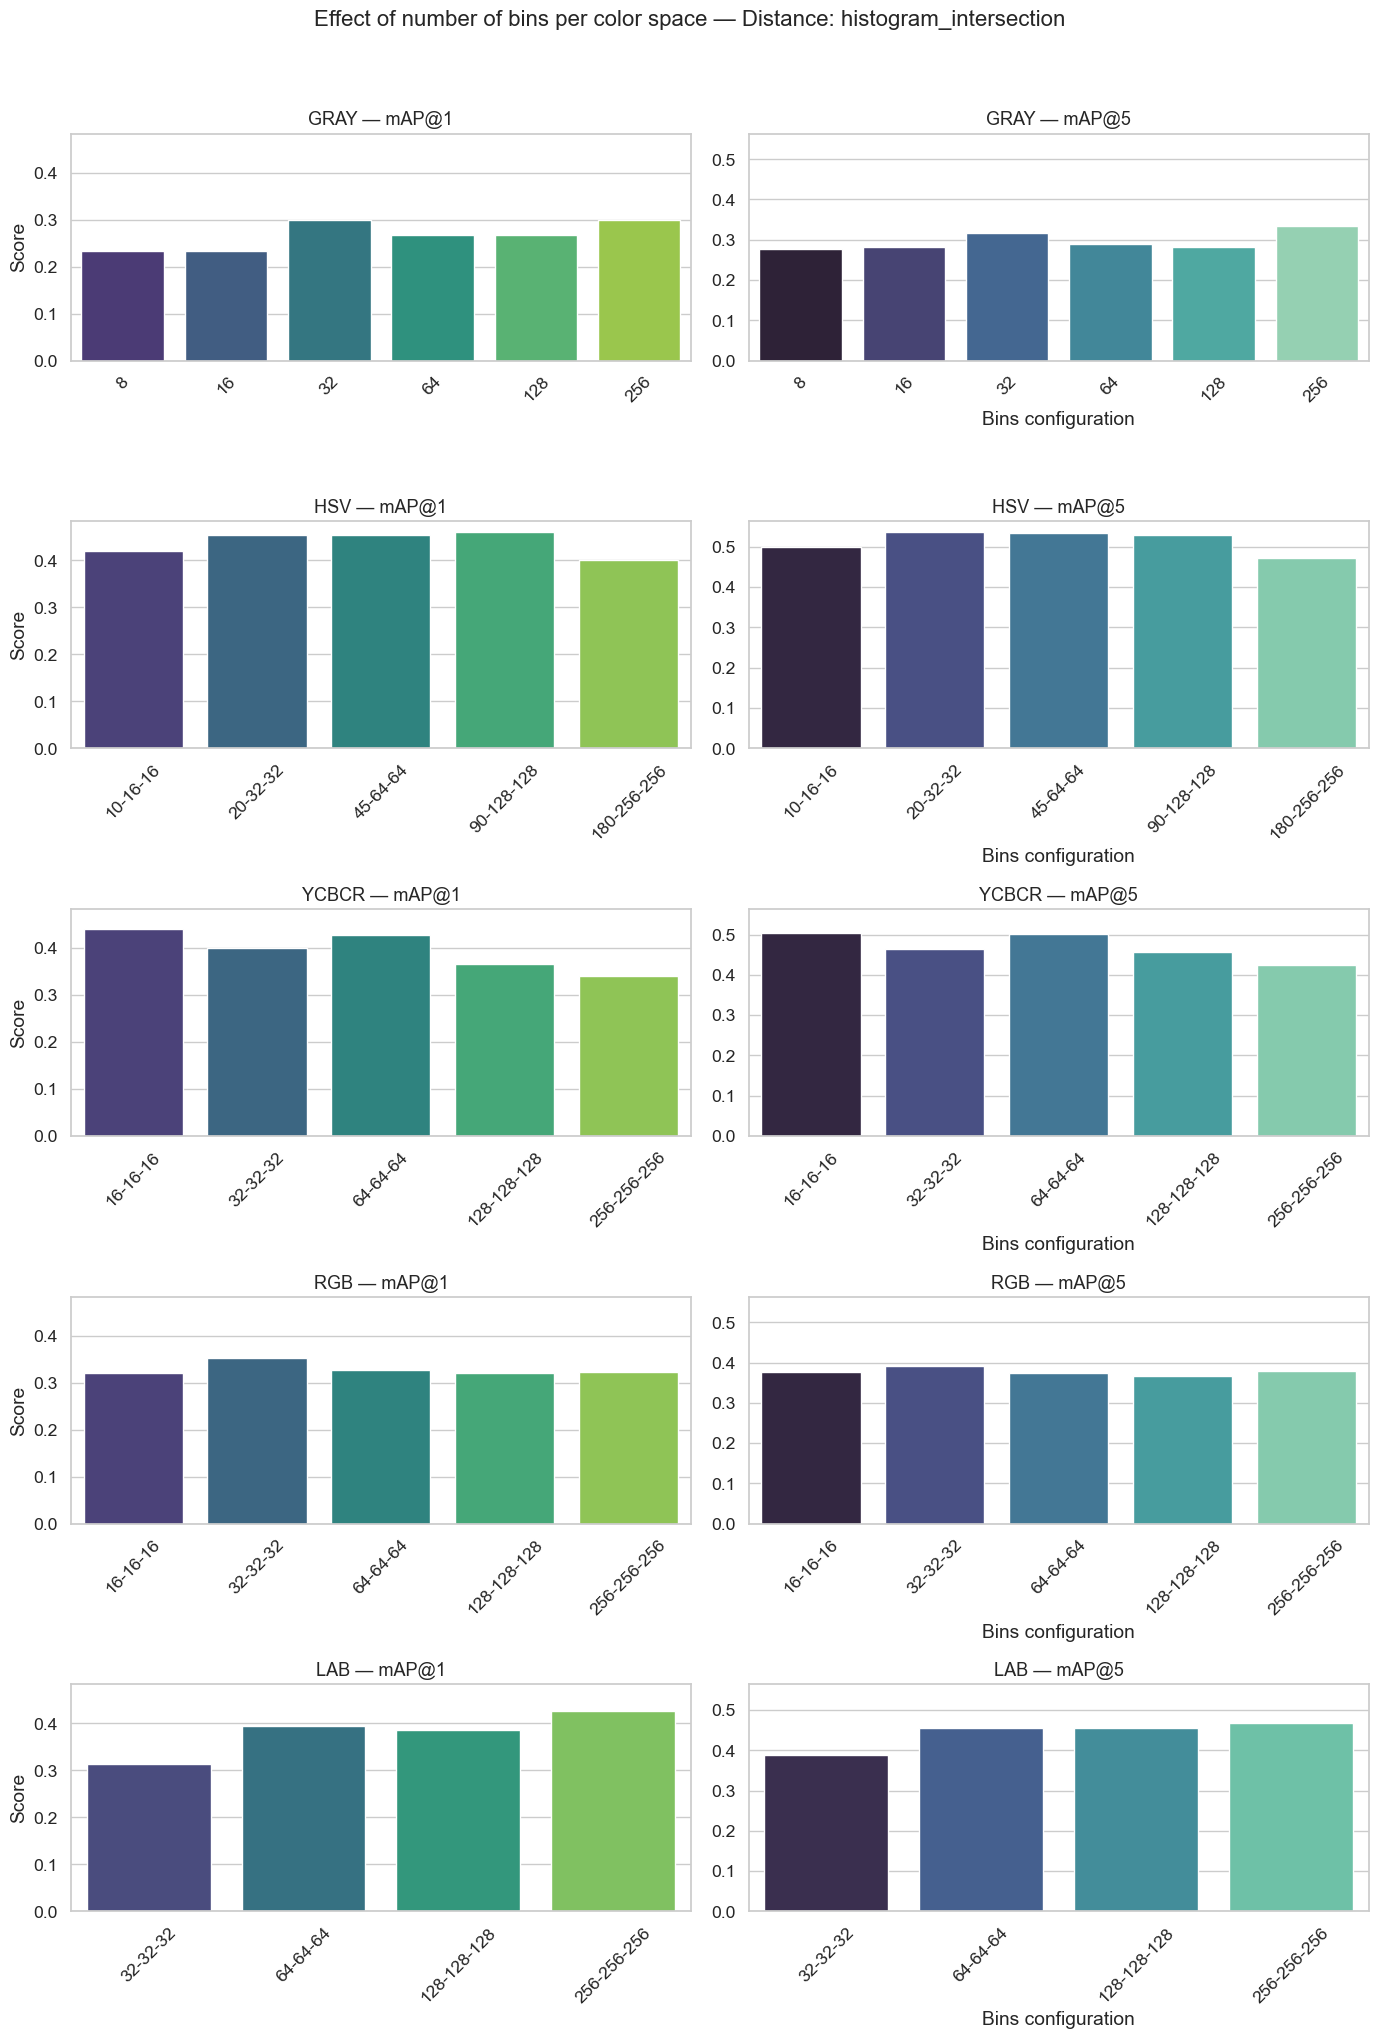

In [ ]:
df = pd.read_csv(csv_path)
df["color_space"] = df["descriptor"].apply(extract_color_space)
df["bins"] = df["descriptor"].apply(extract_bins)
df["weights"] = df["descriptor"].apply(extract_weights)

df_grouped = (
    df.groupby(["distance", "color_space", "bins"], as_index=False)[["mAP@1", "mAP@5"]]
    .mean()
)

def bins_key(b):
    nums = [int(x) for x in b.split('-') if x.isdigit()]
    return sum(nums) / len(nums) if nums else 0

df_grouped["bins_order"] = df_grouped["bins"].apply(bins_key)
df_grouped = df_grouped.sort_values(by="bins_order")

sns.set(style="whitegrid", font_scale=1.15)
unique_dists = df_grouped["distance"].unique()
unique_spaces = df_grouped["color_space"].unique()

for dist in unique_dists:
    subset_dist = df_grouped[df_grouped["distance"] == dist]

    n_spaces = len(unique_spaces)
    fig, axes = plt.subplots(
        n_spaces, 2, figsize=(14, 4 * n_spaces), sharey="col"
    )
    fig.suptitle(f"Effect of number of bins per color space — Distance: {dist}",
                 fontsize=16, y=1.02)

    if n_spaces == 1:
        axes = [axes]

    for i, space in enumerate(unique_spaces):
        subset_space = subset_dist[subset_dist["color_space"] == space]

        # --- mAP@1 ---
        sns.barplot(
            data=subset_space,
            x="bins", y="mAP@1",
            palette="viridis", ax=axes[i][0]
        )
        axes[i][0].set_title(f"{space.upper()} — mAP@1", fontsize=13)
        axes[i][0].set_xlabel("")
        axes[i][0].set_ylabel("Score")
        axes[i][0].tick_params(axis="x", rotation=45)

        # --- mAP@5 ---
        sns.barplot(
            data=subset_space,
            x="bins", y="mAP@5",
            palette="mako", ax=axes[i][1]
        )
        axes[i][1].set_title(f"{space.upper()} — mAP@5", fontsize=13)
        axes[i][1].set_xlabel("Bins configuration")
        axes[i][1].set_ylabel("")
        axes[i][1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


Reference image:

287


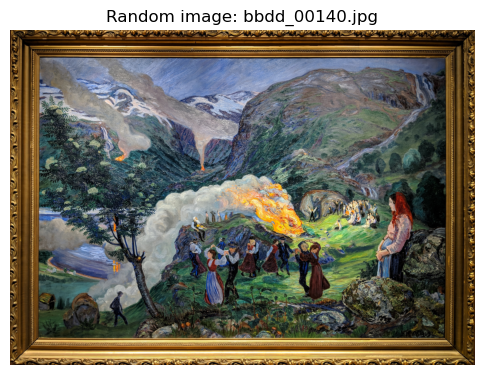

In [ ]:
IMG_IDX = 140


# Obtain db_images
db_images = sorted([p for p in io_config.DB_DIR.iterdir() if p.suffix.lower() == ".jpg"])
print(len(db_images))
random_image_path = db_images[IMG_IDX]
img = cv2.imread(str(random_image_path))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Random image: {random_image_path.name}")
plt.show()


**HSV ANALYSIS**

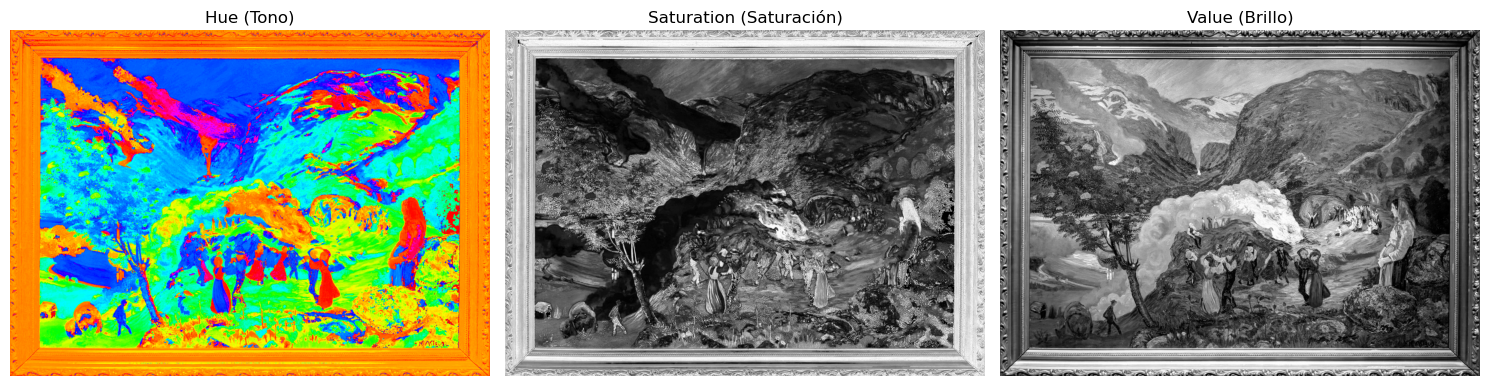

In [21]:
# To HSC
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)

# Show 3 channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(h, cmap='hsv')
axes[0].set_title("Hue (Tono)")
axes[1].imshow(s, cmap='gray')
axes[1].set_title("Saturation (Saturación)")
axes[2].imshow(v, cmap='gray')
axes[2].set_title("Value (Brillo)")
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()


Histograms

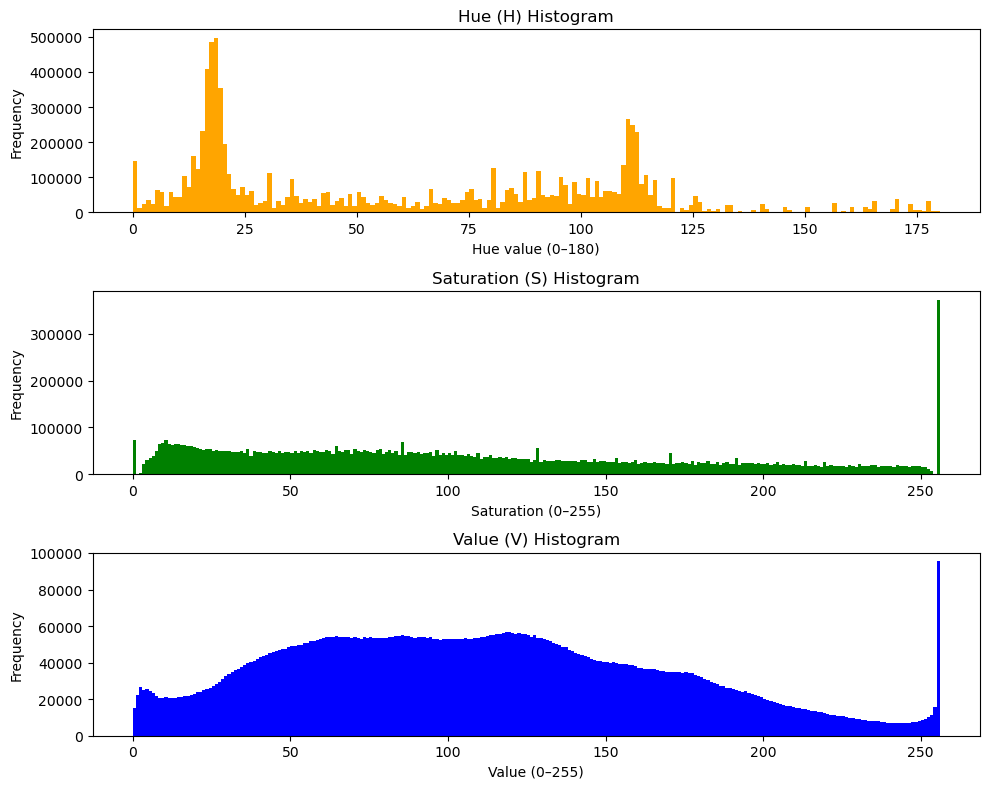

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
# hue histogram
axes[0].hist(h.ravel(), bins=180, range=(0,180), color='orange')
axes[0].set_title('Hue (H) Histogram')
axes[0].set_xlabel('Hue value (0–180)')
axes[0].set_ylabel('Frequency')

# saturation histogram
axes[1].hist(s.ravel(), bins=256, range=(0,256), color='green')
axes[1].set_title('Saturation (S) Histogram')
axes[1].set_xlabel('Saturation (0–255)')
axes[1].set_ylabel('Frequency')

# Value histogram
axes[2].hist(v.ravel(), bins=256, range=(0,256), color='blue')
axes[2].set_title('Value (V) Histogram')
axes[2].set_xlabel('Value (0–255)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Modifications with weights

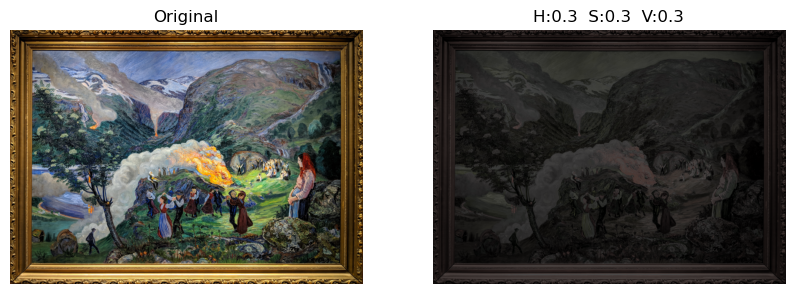

In [33]:
weights = np.array([0.3, 0.3, 0.3])  # H, S, V

# Aplicar los pesos
img_hsv_weighted = img_hsv * weights

img_hsv_weighted[...,0] = np.clip(img_hsv_weighted[...,0], 0, 179)
img_hsv_weighted[...,1:] = np.clip(img_hsv_weighted[...,1:], 0, 255)


img_bgr_weighted = cv2.cvtColor(img_hsv_weighted.astype(np.uint8), cv2.COLOR_HSV2BGR)

# Mostrar original vs ponderado
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_bgr_weighted, cv2.COLOR_BGR2RGB))
plt.title(f"H:{weights[0]}  S:{weights[1]}  V:{weights[2]}")
plt.axis("off")

plt.show()
